<a href="https://colab.research.google.com/github/Nandini2525/Stock-sales-prediction/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv("/content/NFLX.csv")

In [ ]:
data.head

<bound method NDFrame.head of             Date        Open        High         Low       Close   Adj Close  \
0     2018-02-05  262.000000  267.899994  250.029999  254.259995  254.259995   
1     2018-02-06  247.699997  266.700012  245.000000  265.720001  265.720001   
2     2018-02-07  266.579987  272.450012  264.329987  264.559998  264.559998   
3     2018-02-08  267.079987  267.619995  250.000000  250.100006  250.100006   
4     2018-02-09  253.850006  255.800003  236.110001  249.470001  249.470001   
...          ...         ...         ...         ...         ...         ...   
1004  2022-01-31  401.970001  427.700012  398.200012  427.140015  427.140015   
1005  2022-02-01  432.959991  458.480011  425.540009  457.130005  457.130005   
1006  2022-02-02  448.250000  451.980011  426.480011  429.480011  429.480011   
1007  2022-02-03  421.440002  429.260010  404.279999  405.600006  405.600006   
1008  2022-02-04  407.309998  412.769989  396.640015  410.170013  410.170013   

        V

In [ ]:
data.shape

(1009, 7)

In [ ]:
future_days=5

In [ ]:
data['prediction']=data['Close'].shift(-future_days)
data[['Close','prediction']]

,Close,prediction
0,254.259995,257.950012
1,265.720001,258.269989
2,264.559998,266.000000
3,250.100006,280.269989
4,249.470001,278.519989
...,...,...
1004,427.140015,NaN
1005,457.130005,NaN
1006,429.480011,NaN
1007,405.600006,NaN


In [ ]:
x=np.array(data[['Close']])
x=x[:data.shape[0]-future_days]
x

array([[254.259995],
       [265.720001],
       [264.559998],
       ...,
       [359.700012],
       [386.700012],
       [384.359985]])

In [ ]:
y=np.array(data['prediction'])
y=y[:-future_days]
y

array([257.950012, 258.269989, 266.      , ..., 429.480011, 405.600006,
       410.170013])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
# using SVM
from sklearn.svm import SVR
svr=SVR(kernel='rbf',C=1,gamma=0.00001)

In [ ]:
svr.fit(x_train,y_train)

SVR(C=1, gamma=1e-05)

In [ ]:
svr_confidence=svr.score(x_test,y_test)
svr_confidence

0.8902416276143701

In [ ]:
y_pred=svr.predict(x_test)
y_pred

array([326.10144918, 372.65128725, 481.69041285, 378.04404808,
       506.57089124, 353.18315128, 374.35280202, 514.00037785,
       515.74909582, 310.24859528, 324.21826329, 471.44445442,
       513.13109476, 362.17674671, 325.58689421, 368.82701573,
       360.04193111, 348.70215418, 334.14987617, 498.81140689,
       371.77435651, 509.67075208, 333.04955149, 349.03771181,
       483.22551153, 383.34572551, 320.3568772 , 372.89465714,
       490.38304218, 488.41629952, 340.74128906, 376.98571609,
       329.45171883, 314.8044094 , 431.25625658, 478.17663881,
       333.96810475, 371.1112947 , 336.49079806, 337.78157834,
       356.8381177 , 372.04017591, 539.48087787, 506.20922932,
       395.09136261, 326.0070501 , 385.14714004, 335.05422989,
       481.94695767, 471.47775007, 487.96446895, 369.05809125,
       557.63844981, 331.34211767, 558.68541172, 374.19470776,
       410.820811  , 375.95601144, 482.95439645, 520.10479609,
       540.72097536, 352.73859202, 384.7760631 , 385.50

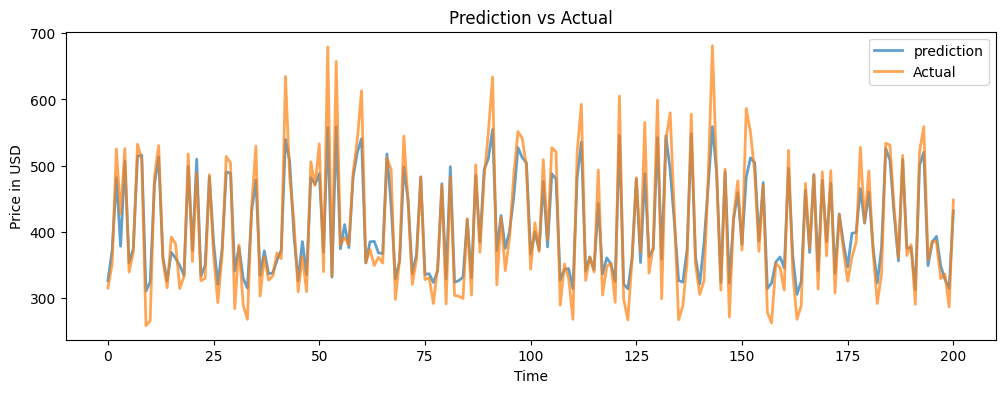

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(y_pred,label='prediction',lw=2,alpha=.7)
plt.plot(y_test,label='Actual',lw=2,alpha=.7)
plt.title('Prediction vs Actual')
plt.ylabel('Price in USD')
plt.xlabel('Time')
plt.legend()